In [13]:
import numpy as np
import pandas as pd
import os
import seaborn as sns 
import plotly.express as px 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
os.chdir('/gdrive/My Drive')

# **Read Data**

In [4]:
data = pd.read_csv('Music Recommendation/data.csv')
genre_data = pd.read_csv('Music Recommendation/data_by_genres.csv')
year_data = pd.read_csv('Music Recommendation/data_by_year.csv')

In [11]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [10]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
print(data.info)

<bound method DataFrame.info of         valence  year  acousticness  ... release_date  speechiness    tempo
0        0.0594  1921       0.98200  ...         1921       0.0366   80.954
1        0.9630  1921       0.73200  ...         1921       0.4150   60.936
2        0.0394  1921       0.96100  ...         1921       0.0339  110.339
3        0.1650  1921       0.96700  ...         1921       0.0354  100.109
4        0.2530  1921       0.95700  ...         1921       0.0380  101.665
...         ...   ...           ...  ...          ...          ...      ...
170648   0.6080  2020       0.08460  ...   2020-05-29       0.0881  105.029
170649   0.7340  2020       0.20600  ...   2020-10-23       0.0605  137.936
170650   0.6370  2020       0.10100  ...   2020-11-03       0.0809   91.688
170651   0.1950  2020       0.00998  ...   2020-01-17       0.3080   75.055
170652   0.6420  2020       0.13200  ...   2020-10-16       0.1080   94.991

[170653 rows x 19 columns]>


In [6]:
print(genre_data.info)

<bound method DataFrame.info of       mode                  genres  acousticness  ...   valence  popularity  key
0        1  21st century classical      0.979333  ...  0.103783   27.833333    6
1        1                   432hz      0.494780  ...  0.221750   52.500000    5
2        1                   8-bit      0.762000  ...  0.975000   48.000000    7
3        1                      []      0.651417  ...  0.513604   20.859882    7
4        1              a cappella      0.676557  ...  0.448249   45.820071    7
...    ...                     ...           ...  ...       ...         ...  ...
2968     1                    zolo      0.222625  ...  0.596155   33.778943    9
2969     0                 zouglou      0.161000  ...  0.845000   58.000000    7
2970     1                    zouk      0.263261  ...  0.824111   46.666667    5
2971     0            zurich indie      0.993000  ...  0.739000    0.000000    7
2972     1                  zydeco      0.421038  ...  0.808544   30.261905  

In [7]:
print(year_data.info)

<bound method DataFrame.info of     mode  year  acousticness  ...   valence  popularity  key
0      1  1921      0.886896  ...  0.379327    0.653333    2
1      1  1922      0.938592  ...  0.535549    0.140845   10
2      1  1923      0.957247  ...  0.625492    5.389189    0
3      1  1924      0.940200  ...  0.663725    0.661017   10
4      1  1925      0.962607  ...  0.621929    2.604317    5
..   ...   ...           ...  ...       ...         ...  ...
95     1  2016      0.284171  ...  0.431532   59.647190    0
96     1  2017      0.286099  ...  0.416476   63.263554    1
97     1  2018      0.267633  ...  0.447921   63.296243    1
98     1  2019      0.278299  ...  0.458818   65.256542    1
99     1  2020      0.219931  ...  0.501048   64.301970    1

[100 rows x 14 columns]>


# **EDA and Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


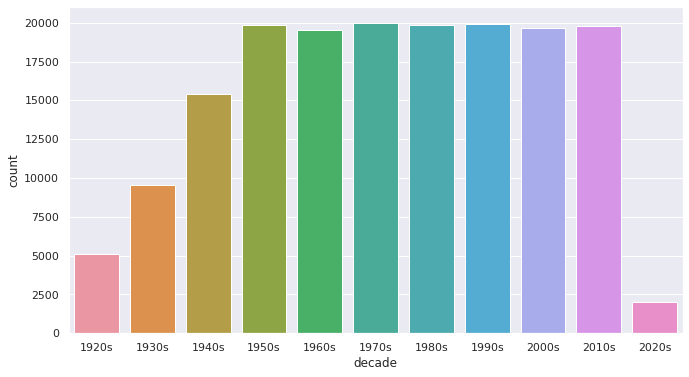

In [8]:
def get_decade(year):
  period_start = int(year/10) * 10
  decade = '{}s'.format(period_start)
  return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11, 6)})
sns.countplot(data['decade'])

In [14]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)

fig.show()